# Featurization and Model Tuning Project

### <center> <div style="text-align: center"> by Mohan Raju</div>  </center>

Data Description:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

Domain:

Cement manufacturing

Context:

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

Attribute Information:

Cement : measured in kg in a m3 mixture
Blast : measured in kg in a m3 mixture
Fly ash : measured in kg in a m3 mixture
Water : measured in kg in a m3 mixture
Superplasticizer : measured in kg in a m3 mixture
Coarse Aggregate : measured in kg in a m3 mixture
Fine Aggregate : measured in kg in a m3 mixture
Age : day (1~365)
Concrete compressive strength measured in MPa

Learning Outcomes:
Exploratory Data Analysis
Building ML models for regression
Hyper parameter tuning

Objective:
Modeling of strength of high performance concrete using Machine Learning

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
from sklearn.impute import SimpleImputer
import statistics
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
# Load Data

dataframe = pd.read_csv("concrete.csv")
dataframe.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
conc = dataframe

In [4]:
conc.shape # Number of Rows & Colums respectively.

(1030, 9)

# Feature Engineering Techniques

In [5]:
conc.info() # Data Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
conc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
conc.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [8]:
conc.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
# Total Number of missing value
conc.isnull().sum().sum()

0

In [10]:
print("conc:",conc.median())

conc: cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64


In [11]:
conc1=conc

In [12]:
conc1.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [13]:
# Outliers
conc1.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [14]:
q1=conc1.quantile(0.25)
q3=conc1.quantile(0.75)
IQR=q3-q1
cwo=((conc1.iloc[:] <(q1-1.5*IQR))|(conc1.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=conc1.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(conc1),2)
opdf


,No. of Outliers,Percentage Outliers
cement,0,0.00
slag,2,0.19
ash,0,0.00
water,9,0.87
superplastic,10,0.97
coarseagg,0,0.00
fineagg,5,0.49
age,59,5.73
strength,4,0.39


# Univariate analysis & Multivariate analysis

Text(0.5, 1.0, 'Age of Mixture')

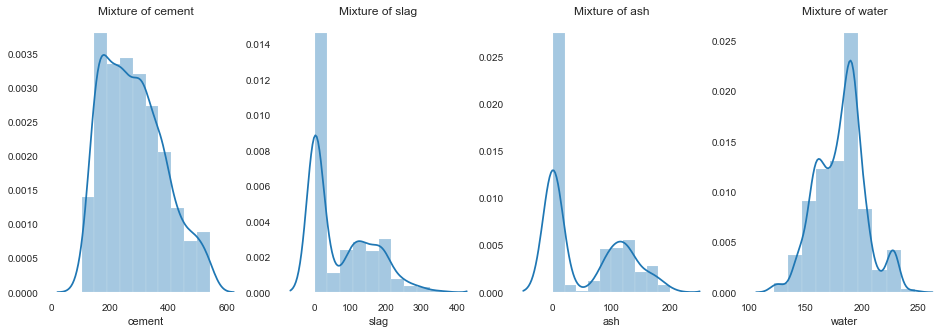

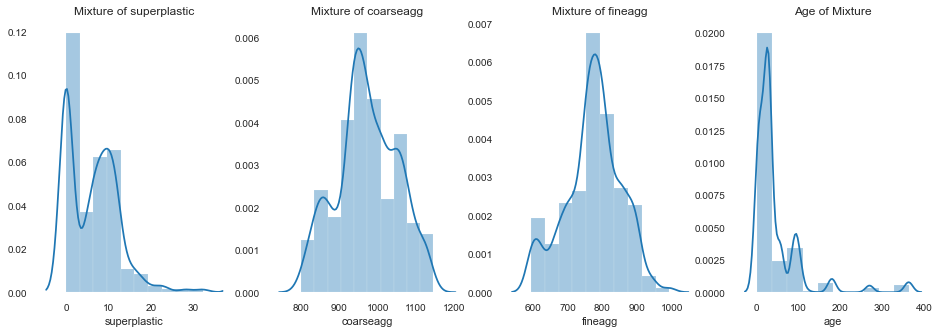

In [15]:
plt.figure(figsize= (16,5))

plt.subplot(1, 4, 1)
sns.distplot(conc1['cement'], bins = 10)
plt.title('Mixture of cement')
             
plt.subplot(1, 4, 2)
sns.distplot(conc1['slag'], bins = 10)
plt.title('Mixture of slag')
             
plt.subplot(1, 4, 3)
sns.distplot(conc1['ash'], bins = 10)
plt.title('Mixture of ash')
             
plt.subplot(1, 4, 4)
sns.distplot(conc1['water'], bins = 10)
plt.title('Mixture of water')


plt.figure(figsize= (16,5))

plt.subplot(1, 4, 1)
sns.distplot(conc1['superplastic'], bins = 10)
plt.title('Mixture of superplastic')

plt.subplot(1, 4, 2)
sns.distplot(conc1['coarseagg'], bins = 10)
plt.title('Mixture of coarseagg')

plt.subplot(1, 4, 3)
sns.distplot(conc1['fineagg'], bins = 10)
plt.title('Mixture of fineagg')

plt.subplot(1, 4, 4)
sns.distplot(conc1['age'], bins = 10)
plt.title('Age of Mixture') 

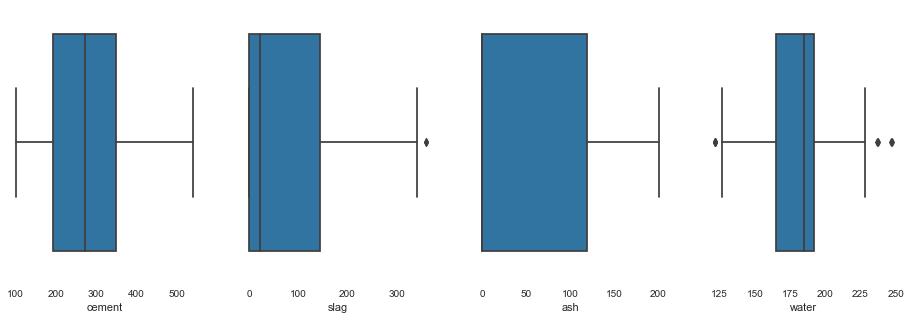

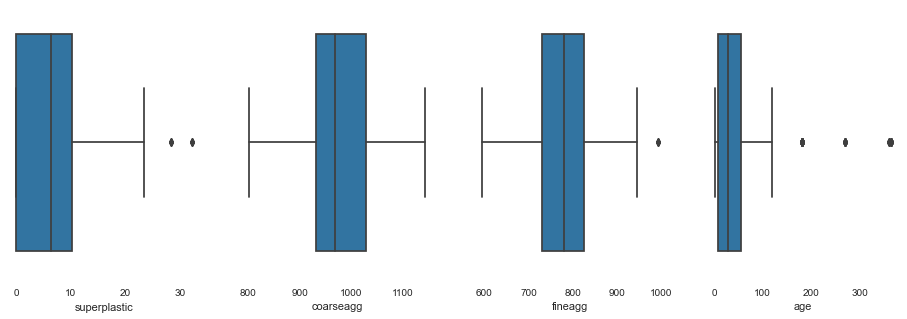

In [136]:
plt.figure(figsize= (16,5))

plt.subplot(1, 4, 1)
sns.boxplot(conc1['cement'])

             
plt.subplot(1, 4, 2)
sns.boxplot(conc1['slag'])

             
plt.subplot(1, 4, 3)
sns.boxplot(conc1['ash'])

             
plt.subplot(1, 4, 4)
sns.boxplot(conc1['water'])

plt.figure(figsize= (16,5))

plt.subplot(1, 4, 1)
sns.boxplot(conc1['superplastic'])

             
plt.subplot(1, 4, 2)
sns.boxplot(conc1['coarseagg'])

             
plt.subplot(1, 4, 3)
sns.boxplot(conc1['fineagg'])

             
plt.subplot(1, 4, 4)
sns.boxplot(conc1['age'])


In [137]:
# Out layers are ignored.

In [138]:
# Multivariate analysis

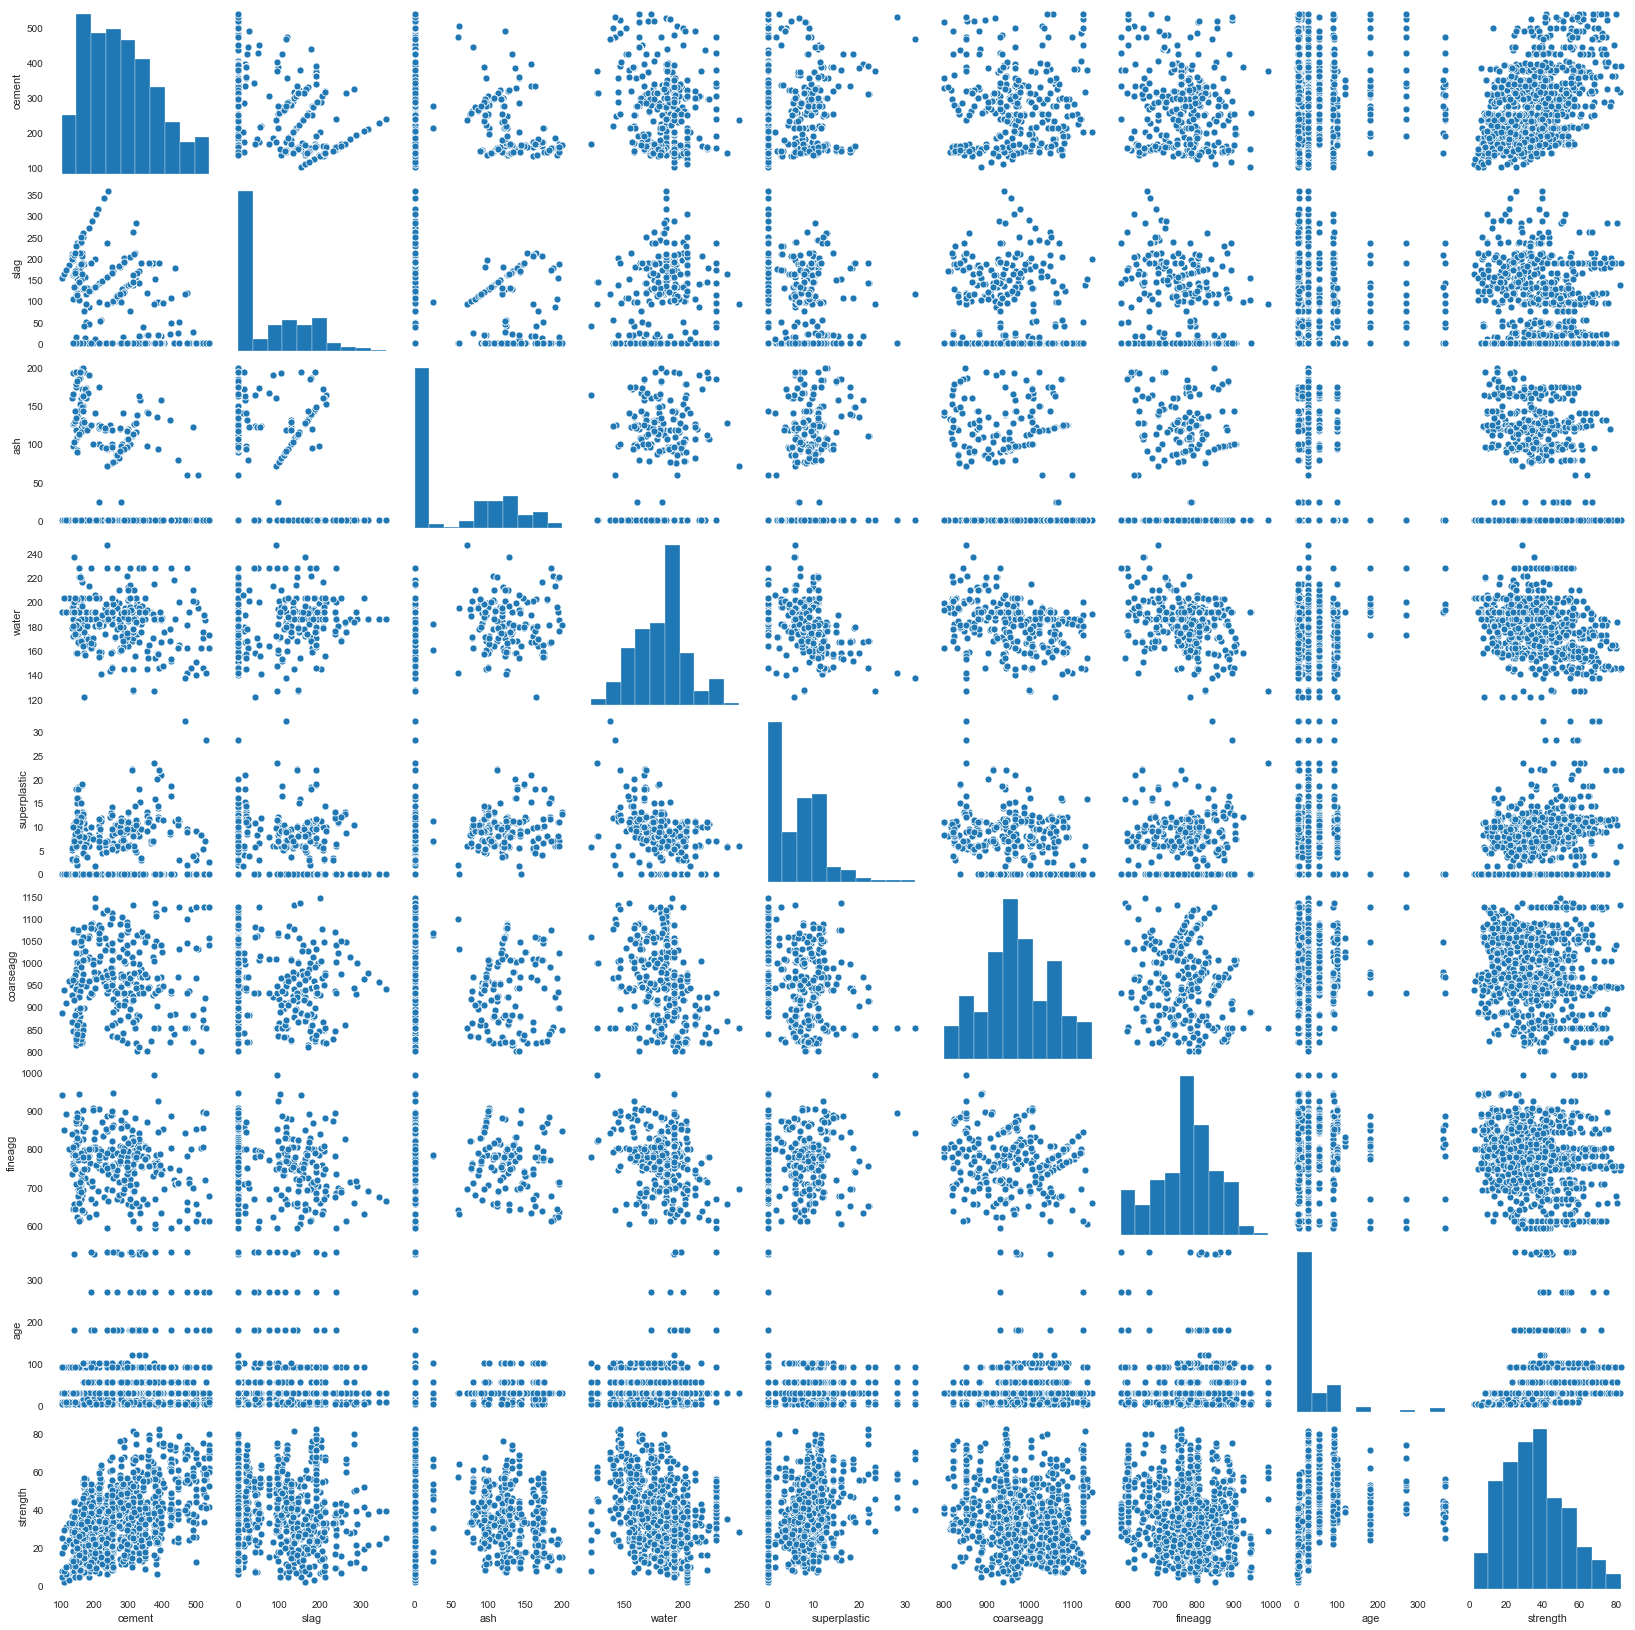

In [139]:
sns.pairplot(conc1)

In [140]:
conc1.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


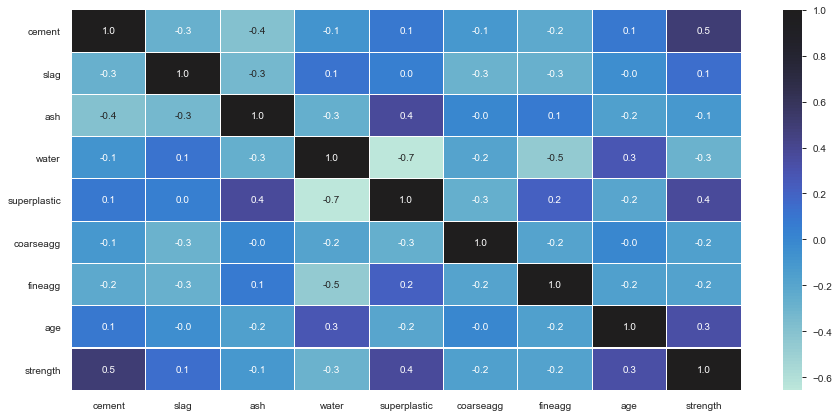

In [141]:
plt.figure(figsize=(15,7))
sns.heatmap(conc1.corr(), annot=True, linewidths=.1, fmt= '.1f', center = 1 )  # heatmap
plt.show()

As per above observation cement, superplastic and age have high corelation



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BCA5FCB88>]],
      dtype=object)

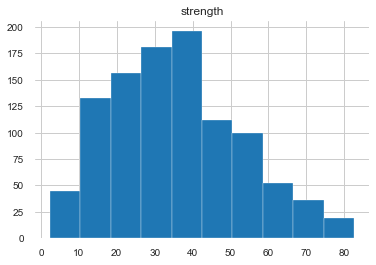

In [142]:
conc1.hist('strength')

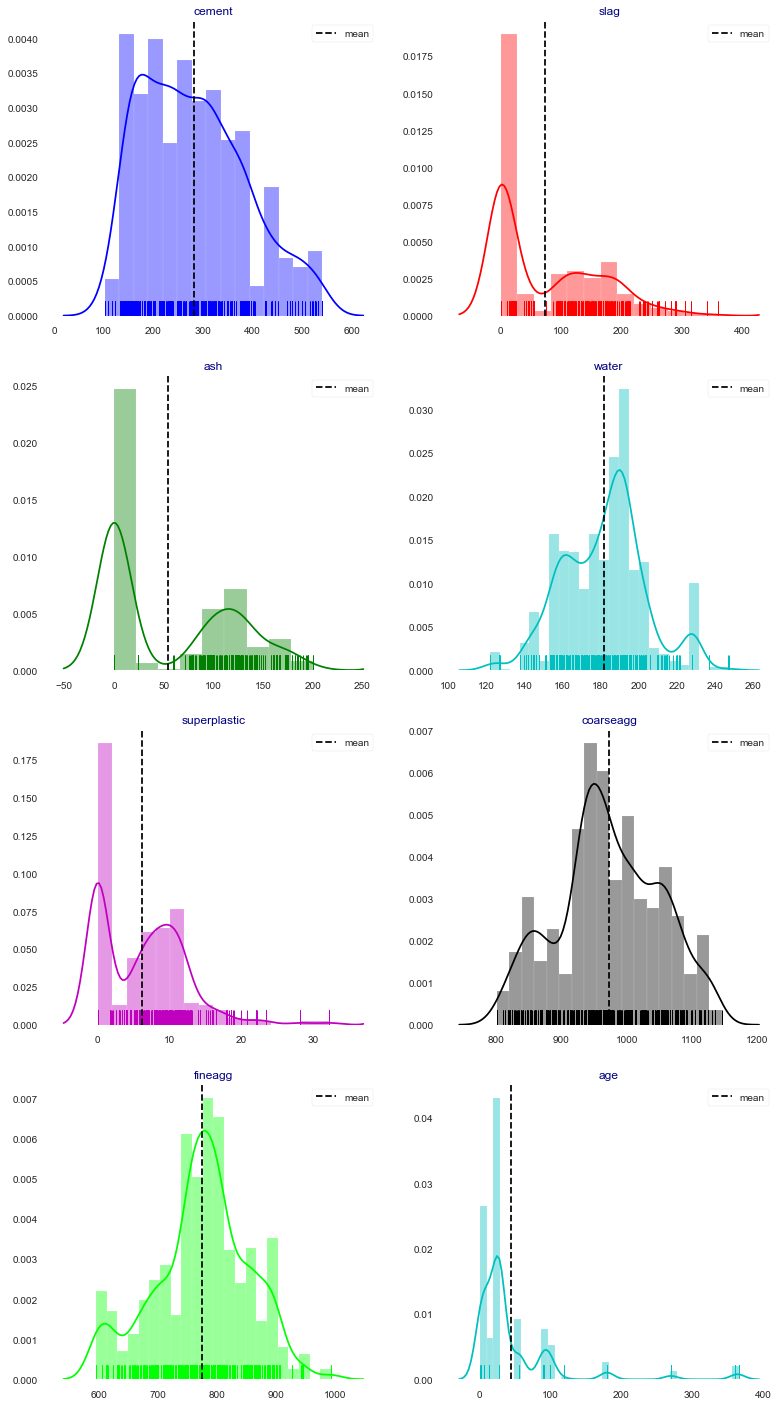

In [143]:
import itertools
cols = [i for i in conc1.columns if i not in 'strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(conc1[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(conc1[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

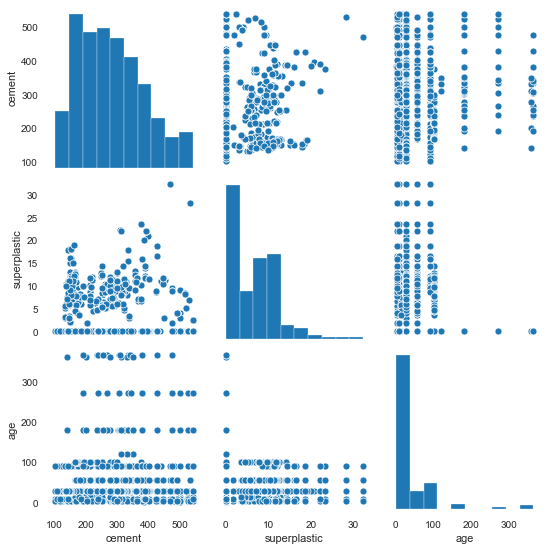

In [144]:
sns.pairplot(conc1, vars=["cement","superplastic","age"])

In [145]:
conc1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [146]:
from scipy.stats import zscore
conc_z = conc1.apply(zscore)

In [147]:
conc_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727


In [148]:
# Splitting data to test & train
X = conc_z.drop(['strength'],axis=1) 
y = conc_z['strength']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print("{0:0.2f}% data is in training set".format((len(X_train)/len(conc_z.index)) * 100))
print(x_test.shape)
print("{0:0.2f}% data is in test set".format((len(x_test)/len(conc_z.index)) * 100))

(721, 8)
70.00% data is in training set
(309, 8)
30.00% data is in test set


In [149]:
X.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733
5,-0.250517,-0.856888,-0.847144,0.488793,-1.039143,-1.069519,2.139079,0.702224
6,-1.094894,2.044404,-0.847144,1.027590,-1.039143,0.034498,-1.010525,-0.612331
7,-0.284981,-0.856888,1.002278,0.324811,0.032715,0.713893,-0.198167,0.163731
8,0.141995,-0.856888,-0.847144,0.488793,-1.039143,1.442184,-0.107073,-0.279733
9,-1.207861,1.276756,1.388421,0.582497,0.468157,-1.195619,-0.930662,-0.279733


In [150]:
import statsmodels.api as sm
from statsmodels.api import add_constant
X2 = add_constant(X_train)
lm= sm.OLS(y_train, X2)
lm2=lm.fit()
lm2.pvalues

const           5.779717e-01
cement          2.646128e-32
slag            4.144513e-18
ash             4.456557e-09
water           2.616661e-02
superplastic    6.044504e-04
coarseagg       3.037941e-02
fineagg         4.134628e-03
age             2.073616e-54
dtype: float64

In [151]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     135.3
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          2.18e-137
Time:                        20:31:10   Log-Likelihood:                -683.03
No. Observations:                 721   AIC:                             1384.
Df Residuals:                     712   BIC:                             1425.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0130      0.023     -0.557   

# Model Creation

In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [153]:
# Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
LR_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
print(LR_model.intercept_, LR_model.coef_)

print('Train Set: ', LR_model.score(X_train, y_train))
print('Test Set: ', LR_model.score(x_test, y_test))

-0.013041400221605253 [ 0.79170803  0.56206087  0.34747677 -0.13186138  0.13449877  0.11183689
  0.1737008   0.41759098]
Train Set:  0.6031487540630229
Test Set:  0.6339136715208273


In [156]:
# Lasso Regression

In [157]:
from sklearn.linear_model import Ridge,Lasso
LasR_model = Lasso()
LasR_model.fit(X_train, y_train,"coef")

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [158]:
print(LasR_model.intercept_, LasR_model.coef_)
print('Train Set: ', LasR_model.score(X_train, y_train))
print('Test Set: ', LasR_model.score(x_test, y_test))

-0.003699645431892013 [ 0.  0. -0. -0.  0. -0. -0.  0.]
Train Set:  0.0
Test Set:  -0.000145691885168997


In [159]:
#Rigid Regression

In [160]:
RR_model = Ridge()
RR_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [161]:
print(RR_model.intercept_, RR_model.coef_)

print('Train Set: ', RR_model.score(X_train, y_train))
print('Test Set: ', RR_model.score(x_test, y_test))

-0.01288480560223505 [ 0.77491116  0.54556738  0.33269791 -0.14306856  0.1345523   0.10046628
  0.15910427  0.41609609]
Train Set:  0.6031071837335765
Test Set:  0.634267851120949


In [162]:
#Decision Tree Regression

In [163]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)
DT_model



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [164]:
print('Train Set: ', DT_model.score(X_train, y_train))
print('Test Set: ', DT_model.score(x_test, y_test))

Train Set:  0.9948592395522299
Test Set:  0.8414529664092882


In [165]:
#Random Forest regression

In [166]:
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor()
RFR_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [167]:
print('Train Set: ', RFR_model.score(X_train, y_train))
print('Test Set: ', RFR_model.score(x_test, y_test))

Train Set:  0.9826889378866654
Test Set:  0.9050657200311149


In [168]:
#AdaBoost regressor

In [169]:
from sklearn.ensemble import AdaBoostRegressor
Ada_model = AdaBoostRegressor()
Ada_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [170]:
print('Train Set: ', Ada_model.score(X_train, y_train))
print('Test Set: ', Ada_model.score(x_test, y_test))

Train Set:  0.8209003618208278
Test Set:  0.7728587172180944


In [171]:
#Gradient Boosting Regressor

In [172]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
Grad_model = GradientBoostingRegressor()
Grad_model = (X_train, y_train)

In [173]:
# SVM Model

In [174]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
SVM_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)) 
SVM_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [175]:
# Cross Validation

In [176]:
# Linear Regression Cross Validation

from math import sqrt
yhat = LR_model.predict(x_test)
yhat[0:5]

LR_yhat = LR_model.predict(x_test)

print("Mean_Squared_Error: %.2f" % mean_squared_error(y_test, LR_yhat))
print("Mean_absolute_error: %.2f" % mean_absolute_error(y_test, LR_yhat) )
print("R2_score: %.2f" % r2_score(y_test, LR_yhat) )
rootMeanSquaredError = sqrt(mean_squared_error(y_test, LR_yhat))
print("RMSE Score:", rootMeanSquaredError)

Mean_Squared_Error: 0.38
Mean_absolute_error: 0.49
R2_score: 0.63
RMSE Score: 0.618177114503482


In [177]:
# Lasso Regression Cross Validation
yhat = LasR_model.predict(x_test)
yhat[0:5]

LasR_yhat = LasR_model.predict(x_test)

print("Mean_Squared_Error: %.2f" % mean_squared_error(y_test, LasR_yhat))
print("Mean_absolute_error: %.2f" % mean_absolute_error(y_test, LasR_yhat) )
print("R2_score: %.2f" % r2_score(y_test, LasR_yhat) )
rootMeanSquaredError = sqrt(mean_squared_error(y_test, LasR_yhat))
print("RMSE Score:", rootMeanSquaredError)

Mean_Squared_Error: 1.04
Mean_absolute_error: 0.85
R2_score: -0.00
RMSE Score: 1.0217691878826145


In [178]:
#Rigid Regression Cross Validation

yhat = RR_model.predict(x_test)
yhat[0:5]

RR_yhat = RR_model.predict(x_test)

print("Mean_Squared_Error: %.2f" % mean_squared_error(y_test, RR_yhat))
print("Mean_absolute_error: %.2f" % mean_absolute_error(y_test, RR_yhat) )
print("R2_score: %.2f" % r2_score(y_test, RR_yhat) )
rootMeanSquaredError = sqrt(mean_squared_error(y_test, RR_yhat))
print("RMSE Score:", rootMeanSquaredError)

Mean_Squared_Error: 0.38
Mean_absolute_error: 0.49
R2_score: 0.63
RMSE Score: 0.6178780064953736


In [179]:
#Decision Tree Regression Cross Validation
yhat = DT_model.predict(x_test)
yhat = DT_model.predict(x_test)
yhat[0:5]

DT_yhat = DT_model.predict(x_test)

print("Mean_Squared_Error: %.2f" % mean_squared_error(y_test, DT_yhat))
print("Mean_absolute_error: %.2f" % mean_absolute_error(y_test, DT_yhat) )
print("R2_score: %.2f" % r2_score(y_test, DT_yhat) )
rootMeanSquaredError = sqrt(mean_squared_error(y_test, DT_yhat))
print("RMSE Score:", rootMeanSquaredError)

Mean_Squared_Error: 0.17
Mean_absolute_error: 0.26
R2_score: 0.84
RMSE Score: 0.4068180635388825


In [180]:
#Random Forest regression
yhat = RFR_model.predict(x_test)
yhat[0:5]

RFR_yhat = RFR_model.predict(x_test)

print("Mean_Squared_Error: %.2f" % mean_squared_error(y_test, RFR_yhat))
print("Mean_absolute_error: %.2f" % mean_absolute_error(y_test, RFR_yhat) )
print("R2_score: %.2f" % r2_score(y_test, RFR_yhat) )
rootMeanSquaredError = sqrt(mean_squared_error(y_test, RFR_yhat))
print("RMSE Score:", rootMeanSquaredError)

Mean_Squared_Error: 0.10
Mean_absolute_error: 0.22
R2_score: 0.91
RMSE Score: 0.31479853184811074


In [181]:
#AdaBoost regressor cross validation

yhat = Ada_model.predict(x_test)
yhat[0:5]

Ada_yhat = Ada_model.predict(x_test)

print("Mean_Squared_Error: %.2f" % mean_squared_error(y_test, Ada_yhat))
print("Mean_absolute_error: %.2f" % mean_absolute_error(y_test, Ada_yhat) )
print("R2_score: %.2f" % r2_score(y_test, Ada_yhat) )
rootMeanSquaredError = sqrt(mean_squared_error(y_test, Ada_yhat))
print("RMSE Score:", rootMeanSquaredError)

Mean_Squared_Error: 0.24
Mean_absolute_error: 0.40
R2_score: 0.77
RMSE Score: 0.48693299632245196


In [182]:
# SVM Cross Validation

In [183]:
yhat = SVM_model.predict(x_test)
yhat[0:5]

SVM_yhat = SVM_model.predict(x_test)

print("Mean_Squared_Error: %.2f" % mean_squared_error(y_test, SVM_yhat))
print("Mean_absolute_error: %.2f" % mean_absolute_error(y_test, SVM_yhat) )
print("R2_score: %.2f" % r2_score(y_test, SVM_yhat) )
rootMeanSquaredError = sqrt(mean_squared_error(y_test, SVM_yhat))
print("RMSE Score:", rootMeanSquaredError)

Mean_Squared_Error: 0.18
Mean_absolute_error: 0.32
R2_score: 0.83
RMSE Score: 0.42082448440030396


# Report
Accuracy Report of the built model using different evaluation metrics:

| Algorithm              | MSE     | MAE      | R2      |  RMSE |  
|------------------------|---------|----------|---------|-------|
| Linear Regression      | 0.38    | 0.49     | 0.63    |  0.61 |
| Lasso Regression       | 1.04    | 0.85     | 0       |  1.02 |
| Rigid Regression       | 0.38    | 0.49     | 0.63    |  0.61 |
| Decision Tree          | 0.14    | 0.25     | 0.87    |  0.37 |
| Random Forest          | 0.10    | 0.21     | 0.91    |  0.31 |
| Support vector Machine | 0.18    | 0.32     | 0.83    |  0.42 |

Random Forest si identifed as most suitable Model



# Tuning the model

In [184]:
# Feature selection

print('Feature importances: \n',pd.DataFrame(RFR_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.324210
slag          0.072888
ash           0.020193
water         0.112882
superplastic  0.056687
coarseagg     0.029617
fineagg       0.036933
age           0.346591


In [185]:
# Dropping Features - ash, coarseagg, fineagg and superplastic and checking the evalution metrics
        
X = conc_z.drop(['strength'],axis=1) 
y = conc_z['strength']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_f = X.drop(['ash', 'coarseagg', 'fineagg', 'superplastic'],axis=1)
X = X_f

In [186]:
# Model fitting after Feature selection
RFR_model = RandomForestRegressor()
RFR_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [187]:
yhat = RFR_model.predict(x_test)
yhat[0:5]

RFR_yhat = RFR_model.predict(x_test)

print("Mean_Squared_Error: %.2f" % mean_squared_error(y_test, RFR_yhat))
print("Mean_absolute_error: %.2f" % mean_absolute_error(y_test, RFR_yhat) )
print("R2_score: %.2f" % r2_score(y_test, RFR_yhat) )
rootMeanSquaredError = sqrt(mean_squared_error(y_test, RFR_yhat))
print("RMSE Score:", rootMeanSquaredError)

Mean_Squared_Error: 0.10
Mean_absolute_error: 0.21
R2_score: 0.91
RMSE Score: 0.311034150619307


Model comparison before and after feature selection, which did not make much difference.

|                   Algorithm| MSE     | MAE      | R2      |  RMSE |  
|--------------------------------------|---------|----------|---------|-------|
|                      Random Forest   | 0.10    | 0.21     | 0.91    |  0.31 |
|Random Forest with Feature selection  | 0.10    | 0.22     | 0.90    |  0.32 |


# Report
Random Forest is identifed as most suitable Model